### Image

In [3]:
import glob
import tiffile as tf
import matplotlib.pyplot as plt 
import imageio.v3 as iio
from matplotlib.backends.backend_pdf import PdfPages
import pickle
import numpy as np

In [4]:
img_dir = '/mnt/aperto/mxia/Tatz_annotations/active_select/tatz_negative_sample/'

In [5]:
img_files = sorted(glob.glob(f'{img_dir}*_img.tif'))
mask_files = sorted(glob.glob(f'{img_dir}*mask.tif'))
img_id = [item.split('/')[-1][:4] for item in img_files]
int_id =[int(item) for item in img_id] 

In [6]:
ori_imgs = ['/mnt/aperto/yin/data/image_masks/' +  item.split('/')[-1] for item in img_files]
ori_masks = ['/mnt/aperto/yin/data/image_masks/' +  item.split('/')[-1] for item in mask_files]

#### check image and mask

In [7]:
img_files

['/mnt/aperto/mxia/Tatz_annotations/active_select/tatz_negative_sample/0013_img.tif',
 '/mnt/aperto/mxia/Tatz_annotations/active_select/tatz_negative_sample/0014_img.tif',
 '/mnt/aperto/mxia/Tatz_annotations/active_select/tatz_negative_sample/0025_img.tif',
 '/mnt/aperto/mxia/Tatz_annotations/active_select/tatz_negative_sample/0026_img.tif',
 '/mnt/aperto/mxia/Tatz_annotations/active_select/tatz_negative_sample/0031_img.tif',
 '/mnt/aperto/mxia/Tatz_annotations/active_select/tatz_negative_sample/0032_img.tif',
 '/mnt/aperto/mxia/Tatz_annotations/active_select/tatz_negative_sample/0039_img.tif',
 '/mnt/aperto/mxia/Tatz_annotations/active_select/tatz_negative_sample/0040_img.tif',
 '/mnt/aperto/mxia/Tatz_annotations/active_select/tatz_negative_sample/0041_img.tif',
 '/mnt/aperto/mxia/Tatz_annotations/active_select/tatz_negative_sample/0047_img.tif',
 '/mnt/aperto/mxia/Tatz_annotations/active_select/tatz_negative_sample/0048_img.tif',
 '/mnt/aperto/mxia/Tatz_annotations/active_select/tatz

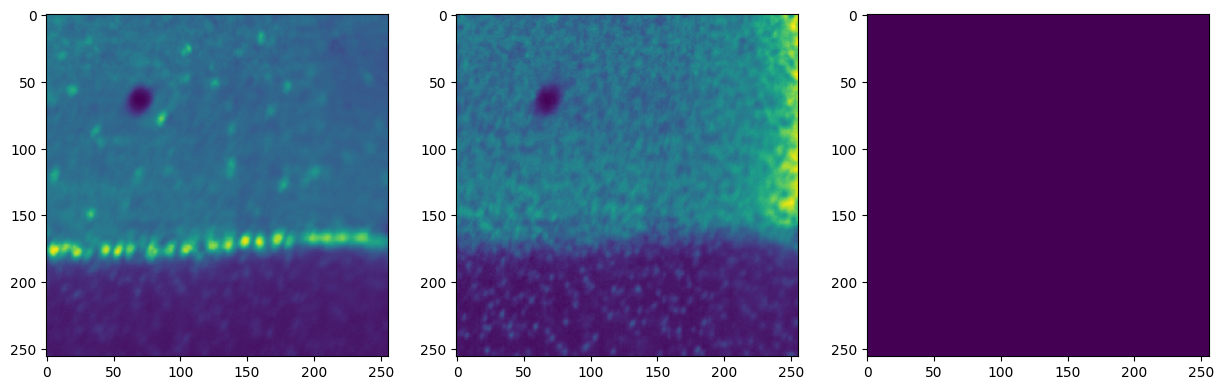

In [9]:
fig, ax = plt.subplots(1,3, figsize = (15,5))
check_id = 10
img = img_files[check_id]
mask = mask_files[check_id]
ax[0].imshow(tf.imread(img)[0])
ax[1].imshow(tf.imread(img)[1])
ax[2].imshow(tf.imread(mask))


In [11]:
# Create a PdfPages object to save the figures
with PdfPages('./check_negative_samples.pdf') as pdf:
    for check_id in range(len(int_id)):        
        fig, ax = plt.subplots(2,3, figsize = (15,10))
        img = img_files[check_id]
        mask = mask_files[check_id]
        ax[0][0].imshow(tf.imread(img)[0])
        ax[0][1].imshow(tf.imread(img)[1])
        ax[0][2].imshow(tf.imread(mask))
        # Set titles for each subplot
        ax[0][0].set_title(f'Image {int_id[check_id]} - Channel 0')
        ax[0][1].set_title(f'Image {int_id[check_id]} - Channel 1')
        ax[0][2].set_title(f'Tatz {int_id[check_id]} Annotation')

        ori_img = ori_imgs[check_id]
        ori_mask = ori_masks[check_id]
        ax[1][0].imshow(tf.imread(ori_img)[0])
        ax[1][1].imshow(tf.imread(ori_img)[1])
        ax[1][2].imshow(tf.imread(ori_mask))
        # Set titles for each subplot
        ax[1][0].set_title(f'Ori Image {int_id[check_id]} - Channel 0')
        ax[1][1].set_title(f'Ori Image {int_id[check_id]} - Channel 1')
        ax[1][2].set_title(f'Yuchen {int_id[check_id]} Annotation')
        
        
        # Adjust layout
        plt.tight_layout()
        
        # Save the current figure into the PDF
        pdf.savefig(fig)
        
        # Close the figure to free memory
        plt.close(fig)

print("PDF saved successfully.")


PDF saved successfully.


### Check saved pickle

In [47]:
with open('./tatz_annotation/tatz_annotation.pkl', 'rb') as f:
    check_data = pickle.load(f)

In [48]:
check_data

,ID,integer_ID,instance_counts,corner,source,ref_channel,channel,crop_size,isHard,plane_position,select_plane
246,0246,246,0,"[983, 7621, 2137]",/mnt/aperto/fused/fused.n5,3,2,"[100, 256, 256]",0,0,True
269,0269,269,6,"[1698, 6076, 2136]",/mnt/aperto/fused/fused.n5,3,1,"[100, 256, 256]",0,44,True
271,0271,271,3,"[1257, 7096, 1954]",/mnt/aperto/fused/fused.n5,3,2,"[100, 256, 256]",0,49,True
274,0274,274,0,"[716, 5718, 4326]",/mnt/aperto/fused/fused.n5,3,2,"[100, 256, 256]",0,0,True
277,0277,277,3,"[1187, 3292, 1448]",/mnt/aperto/fused/fused.n5,3,4,"[100, 256, 256]",0,49,True
279,0279,279,3,"[1153, 4636, 2866]",/mnt/aperto/fused/fused.n5,3,4,"[100, 256, 256]",0,49,True
